<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [1]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-08-25 01:12:54--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-08-25 01:12:54--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv’

bitcoin_2019-08-26_ 100%[===================>

In [2]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [3]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [4]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [6]:
len(df)

1825

In [7]:
bitcoin_price = pd.DataFrame(df['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2024-08-23,63979.97
2024-08-22,60386.02
2024-08-21,61109.99
2024-08-20,59056.01
2024-08-19,59562.71


In [8]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [9]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

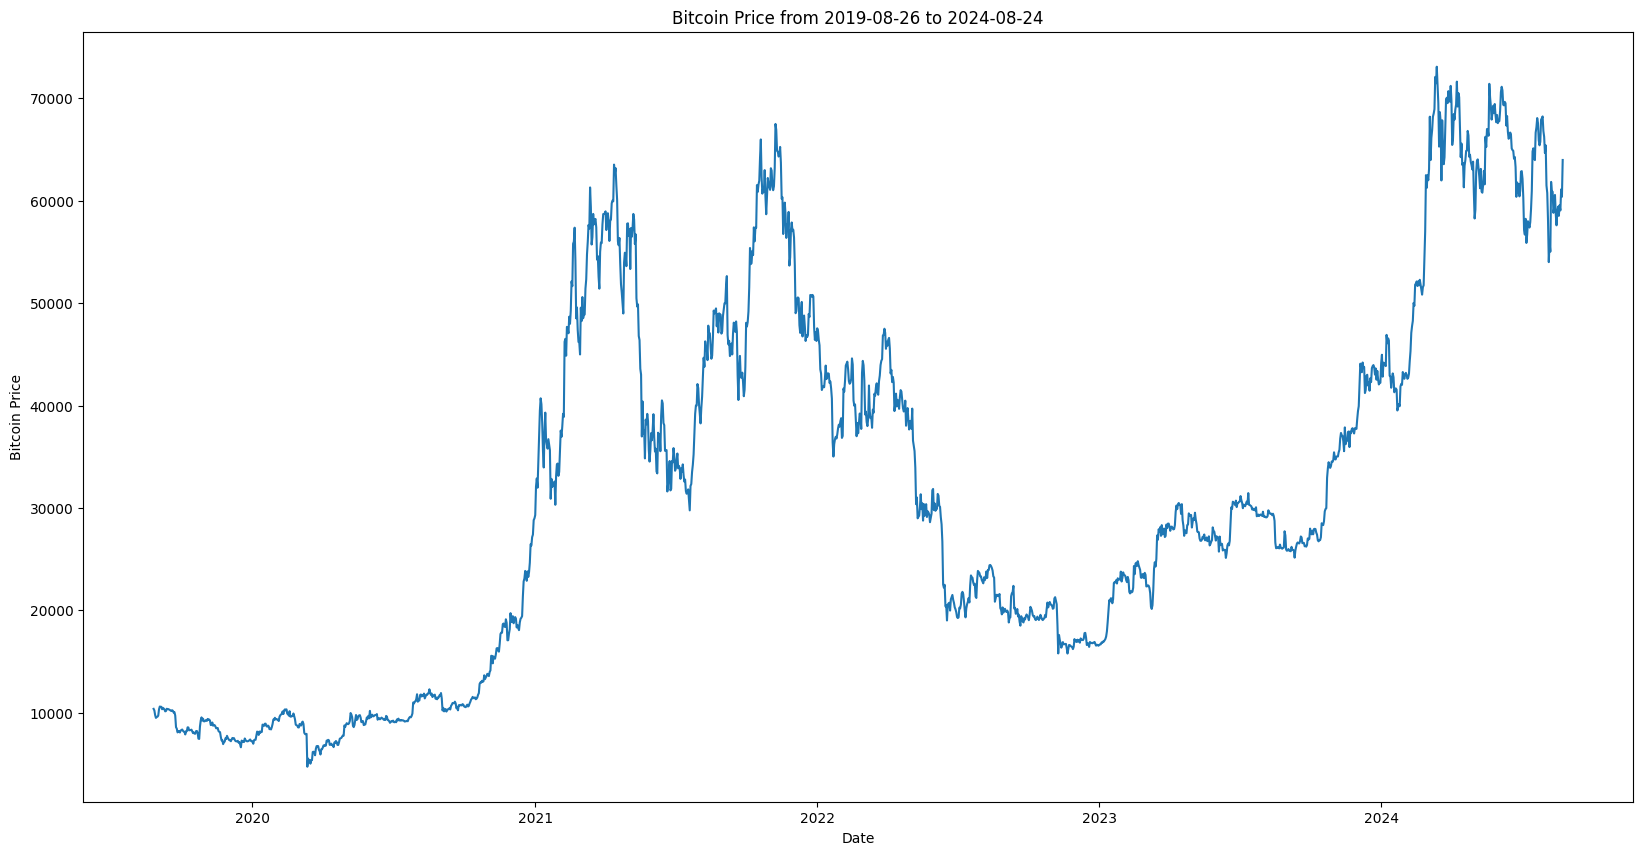

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [11]:
bitcoin_price[:5]

,price
Start,
2024-08-23,63979.97
2024-08-22,60386.02
2024-08-21,61109.99
2024-08-20,59056.01
2024-08-19,59562.71


In [12]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2024-08-23T00:00:00.000000000', '2024-08-22T00:00:00.000000000',
        '2024-08-21T00:00:00.000000000', '2024-08-20T00:00:00.000000000',
        '2024-08-19T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([63979.97, 60386.02, 61109.99, 59056.01, 59562.71]))

In [13]:
split = int(len(prices)  * 0.2)
split

365

In [14]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[split:], prices[split:]
X_test, y_test = timesteps[:split], prices[:split]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

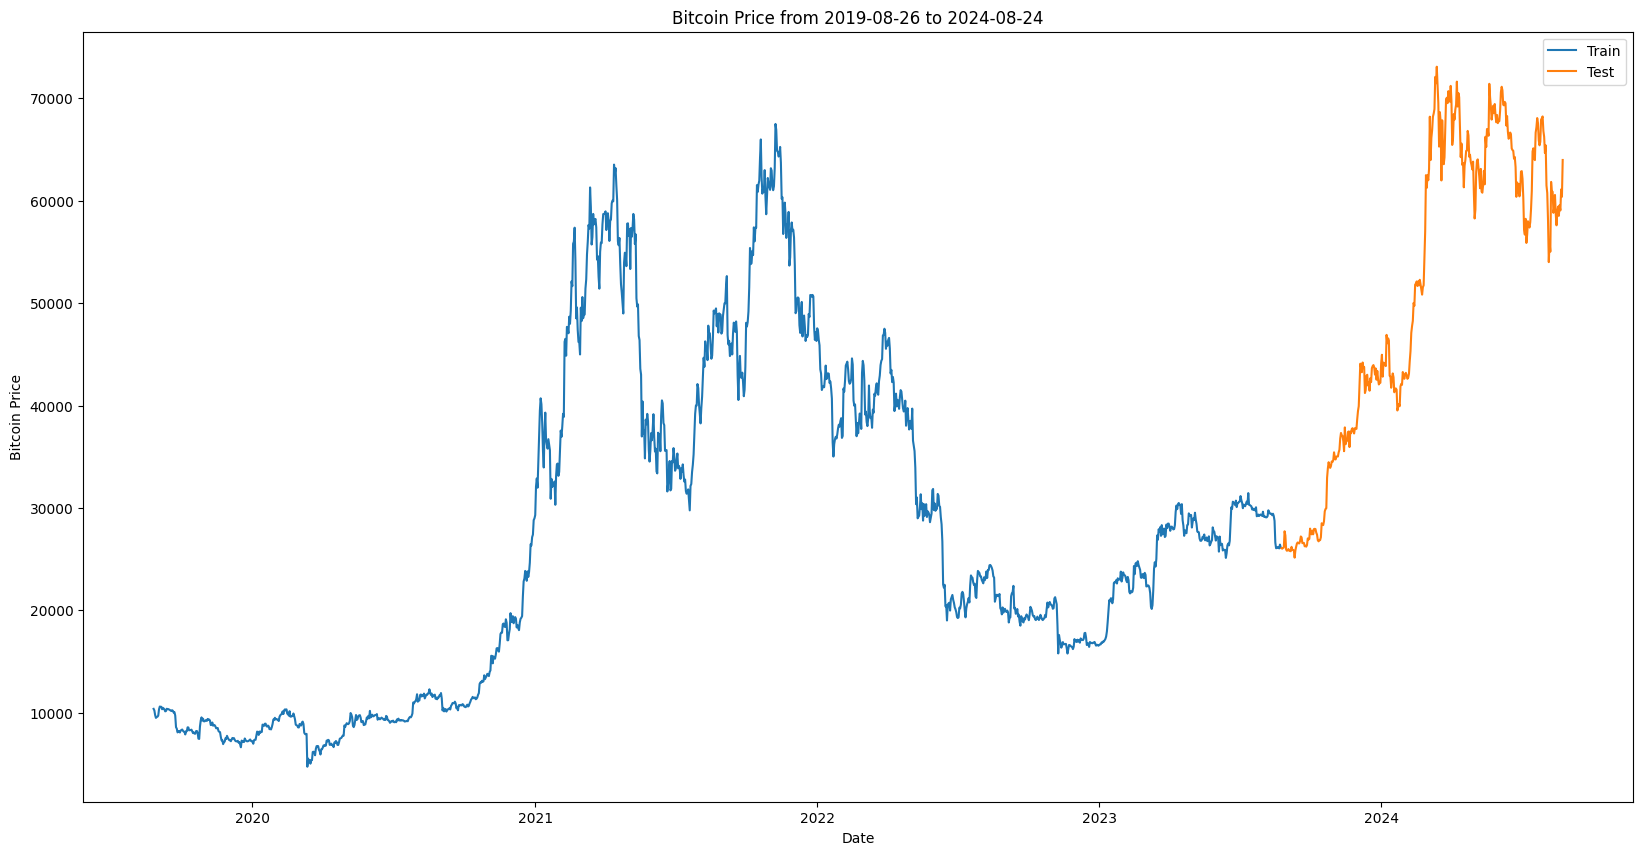

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [16]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

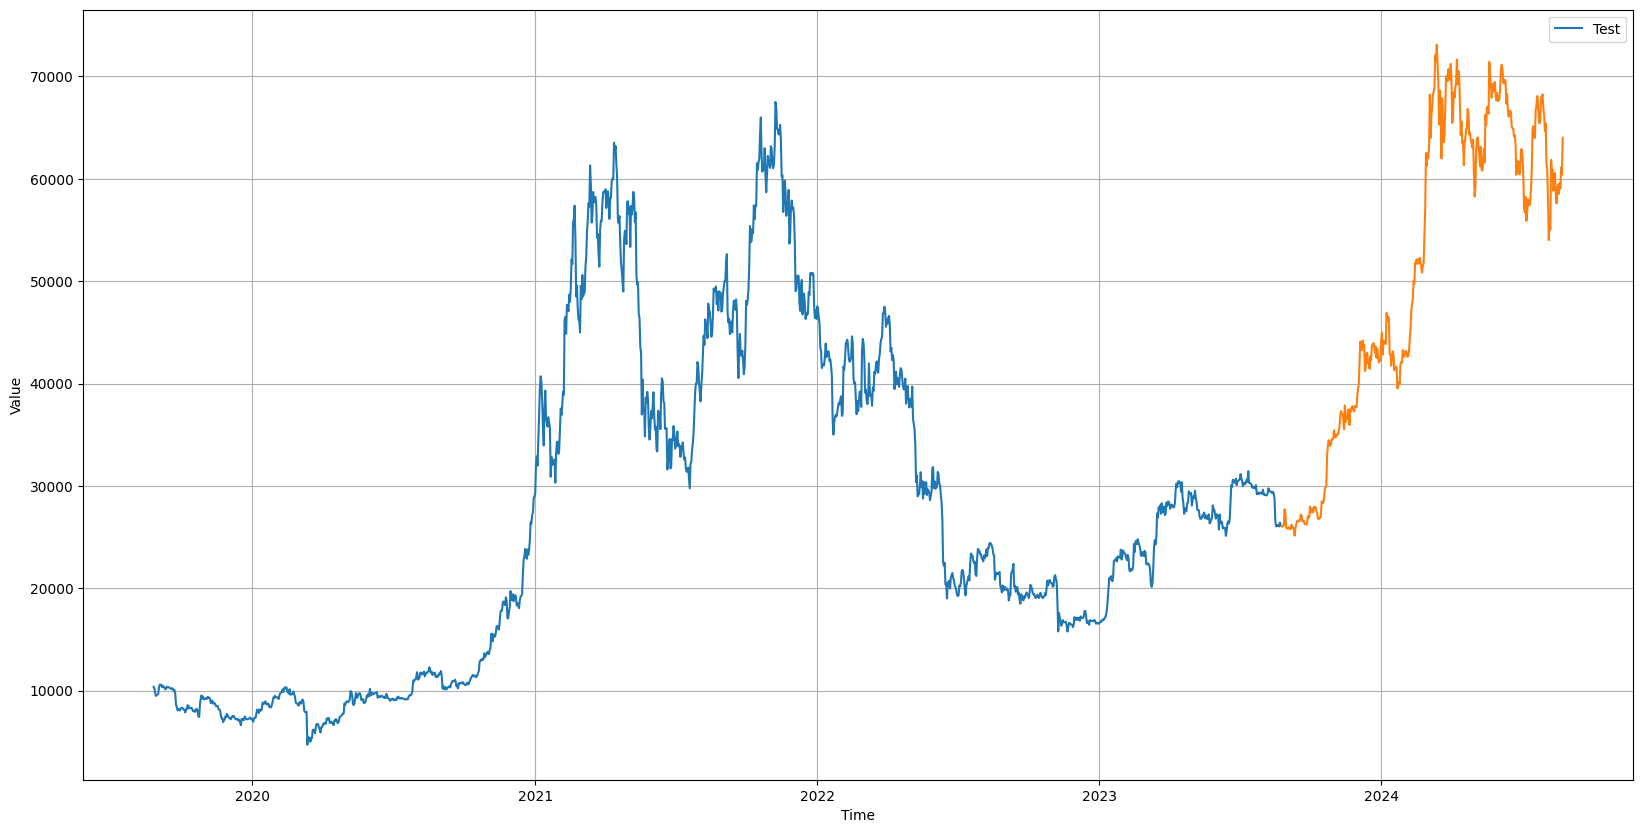

In [17]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [26]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([63979.97, 60386.02, 61109.99, 59056.01, 59562.71, 58525.95,
       59420.03, 58902.1 , 57600.  , 58730.93])

In [25]:
y_test[:10]

array([63979.97, 60386.02, 61109.99, 59056.01, 59562.71, 58525.95,
       59420.03, 58902.1 , 57600.  , 58730.93])

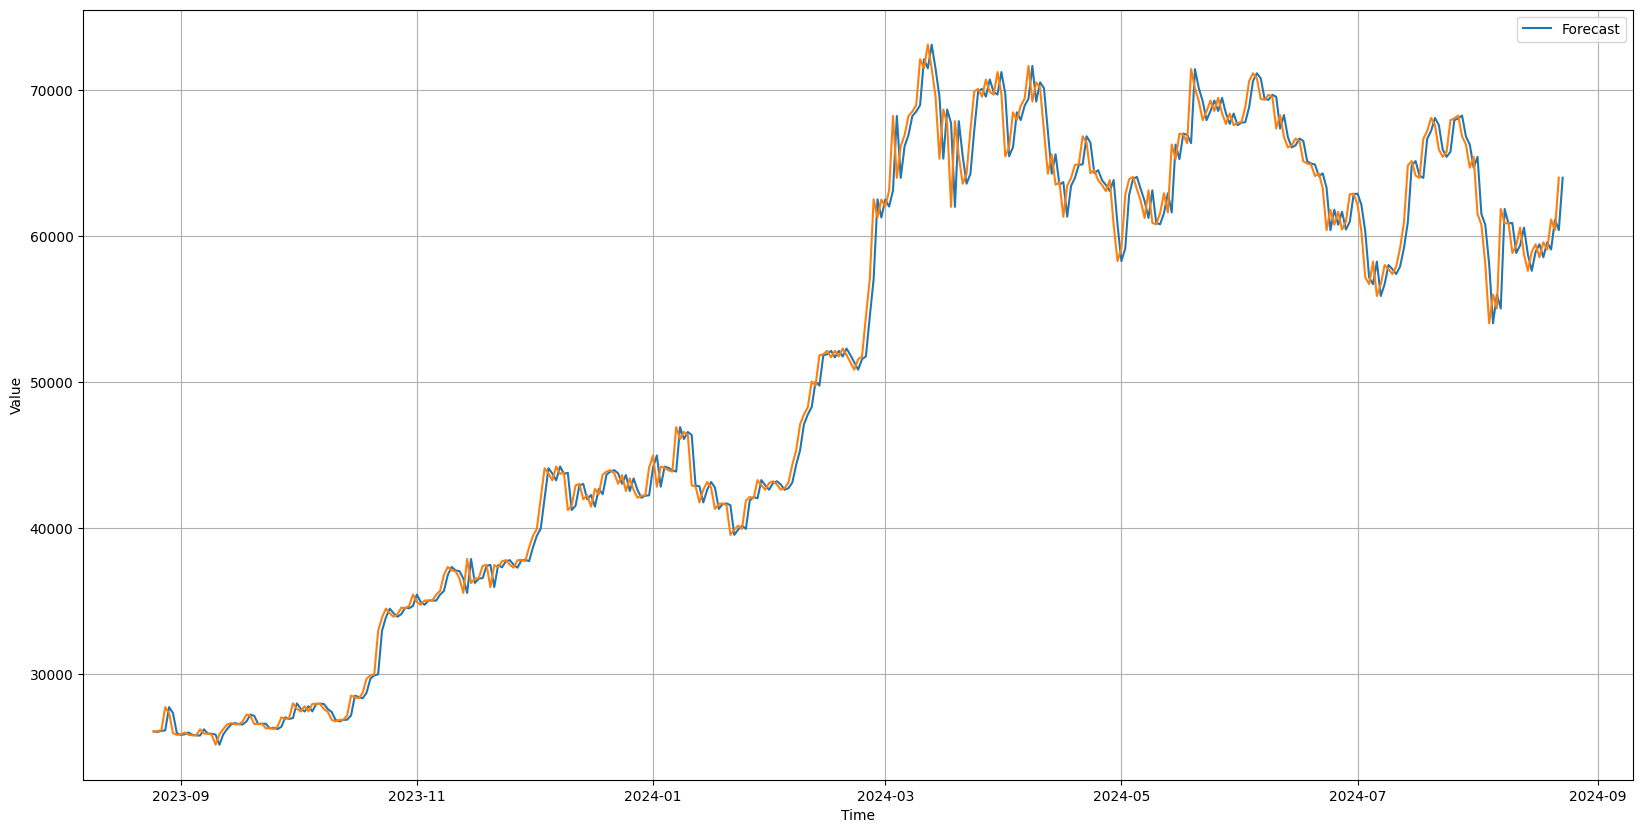

In [29]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [42]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [43]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8748449}

In [60]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon]

In [61]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [64]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [76]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [77]:
prices[:10]

array([63979.97, 60386.02, 61109.99, 59056.01, 59562.71, 58525.95,
       59420.03, 58902.1 , 57600.  , 58730.93])

In [82]:
 window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) + 1), axis=0).T

 window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13]])

In [89]:
 windows = prices[:14][window_index]
windows

array([[63979.97, 60386.02, 61109.99, 59056.01, 59562.71, 58525.95,
        59420.03, 58902.1 ],
       [60386.02, 61109.99, 59056.01, 59562.71, 58525.95, 59420.03,
        58902.1 , 57600.  ],
       [61109.99, 59056.01, 59562.71, 58525.95, 59420.03, 58902.1 ,
        57600.  , 58730.93],
       [59056.01, 59562.71, 58525.95, 59420.03, 58902.1 , 57600.  ,
        58730.93, 60565.01],
       [59562.71, 58525.95, 59420.03, 58902.1 , 57600.  , 58730.93,
        60565.01, 59342.02],
       [58525.95, 59420.03, 58902.1 , 57600.  , 58730.93, 60565.01,
        59342.02, 58819.99],
       [59420.03, 58902.1 , 57600.  , 58730.93, 60565.01, 59342.02,
        58819.99, 60875.98]])

In [90]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon) + 1), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows)

  return window, label

In [93]:
all_windows, all_labels = make_windows(prices)

len(all_windows), len(all_labels)

(1818, 1818)

In [94]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[63979.97 60386.02 61109.99 59056.01 59562.71 58525.95 59420.03] 58902.1
[60386.02 61109.99 59056.01 59562.71 58525.95 59420.03 58902.1 ] 57600.0
[61109.99 59056.01 59562.71 58525.95 59420.03 58902.1  57600.  ] 58730.93
[59056.01 59562.71 58525.95 59420.03 58902.1  57600.   58730.93] 60565.01
[59562.71 58525.95 59420.03 58902.1  57600.   58730.93 60565.01] 59342.02
